In [1]:
import pandas as pd
import numpy as np
from pandas import Series,DataFrame

In [2]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

from datetime import datetime

from __future__ import division

%matplotlib inline

C:\Users\Harmandeep\Anaconda2\lib\site-packages\matplotlib\__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [3]:
from pandas.io.data import DataReader

C:\Users\Harmandeep\Anaconda2\lib\site-packages\pandas\io\data.py:33: FutureWarning: 
The pandas.io.data module is moved to a separate package (pandas-datareader) and will be removed from pandas in a future version.
After installing the pandas-datareader package (https://github.com/pydata/pandas-datareader), you can change the import ``from pandas.io import data, wb`` to ``from pandas_datareader import data, wb``.
  FutureWarning)


In [4]:
tech_list = ['AAPL','GOOG','MSFT','AMZN','SNE']
# Set up End and Start times for data grab
end = datetime.now()
start = datetime(end.year - 1,end.month,end.day)


#For loop for grabing yahoo finance data and setting as a dataframe

for stock in tech_list:   
    # Set DataFrame as the Stock Ticker
    globals()[stock] = DataReader(stock,'yahoo',start,end)

In [5]:
AAPL.info()


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 251 entries, 2015-01-20 to 2016-01-15
Data columns (total 6 columns):
Open         251 non-null float64
High         251 non-null float64
Low          251 non-null float64
Close        251 non-null float64
Volume       251 non-null int64
Adj Close    251 non-null float64
dtypes: float64(5), int64(1)
memory usage: 13.7 KB


In [6]:
AAPL.head()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2015-01-20,107.839996,108.970001,106.500000,108.720001,49899900,106.898626
2015-01-21,108.949997,111.059998,108.269997,109.550003,48575900,107.714723
2015-01-22,110.260002,112.470001,109.720001,112.400002,53796400,110.516976
2015-01-23,112.300003,113.750000,111.529999,112.980003,46464800,111.087261
2015-01-26,113.739998,114.360001,112.800003,113.099998,55615000,111.205246


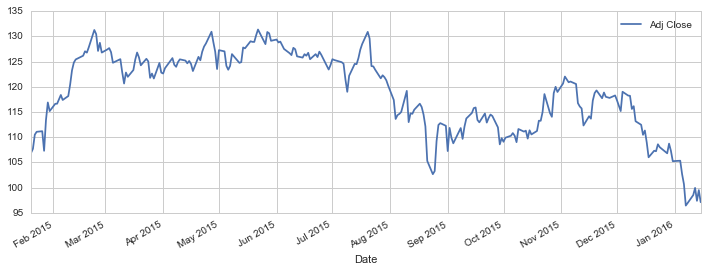

In [7]:
AAPL['Adj Close'].plot(legend=True,figsize=(12,4))

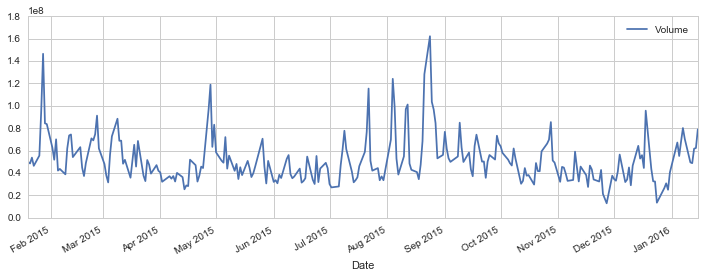

In [8]:
AAPL['Volume'].plot(legend=True,figsize=(12,4))

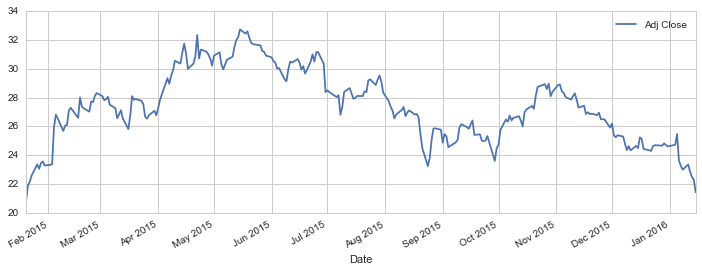

In [9]:
SNE['Adj Close'].plot(legend=True,figsize=(12,4))

In [10]:
ma_day = [10,20,50,200]

for ma in ma_day:
    column_name = "MA for %s days" %(str(ma))
    AAPL[column_name]=pd.rolling_mean(AAPL['Adj Close'],ma)

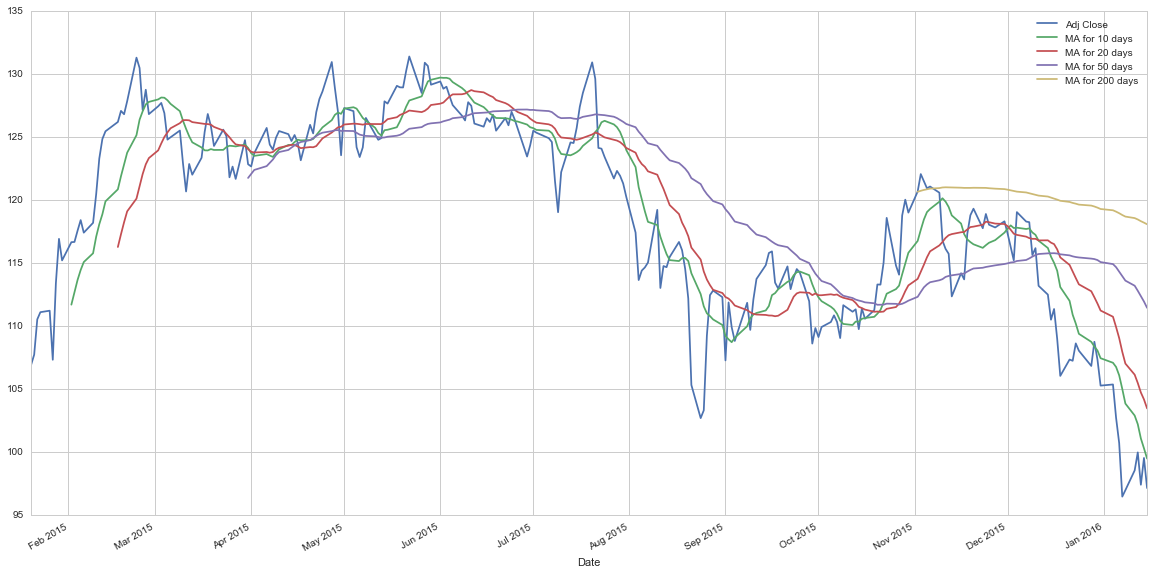

In [11]:
AAPL[['Adj Close','MA for 10 days','MA for 20 days','MA for 50 days','MA for 200 days']].plot(legend=True,figsize=(20,10))

In [12]:
AAPL.head()

,Open,High,Low,Close,Volume,Adj Close,MA for 10 days,MA for 20 days,MA for 50 days,MA for 200 days
Date,,,,,,,,,,
2015-01-20,107.839996,108.970001,106.500000,108.720001,49899900,106.898626,NaN,NaN,NaN,NaN
2015-01-21,108.949997,111.059998,108.269997,109.550003,48575900,107.714723,NaN,NaN,NaN,NaN
2015-01-22,110.260002,112.470001,109.720001,112.400002,53796400,110.516976,NaN,NaN,NaN,NaN
2015-01-23,112.300003,113.750000,111.529999,112.980003,46464800,111.087261,NaN,NaN,NaN,NaN
2015-01-26,113.739998,114.360001,112.800003,113.099998,55615000,111.205246,NaN,NaN,NaN,NaN


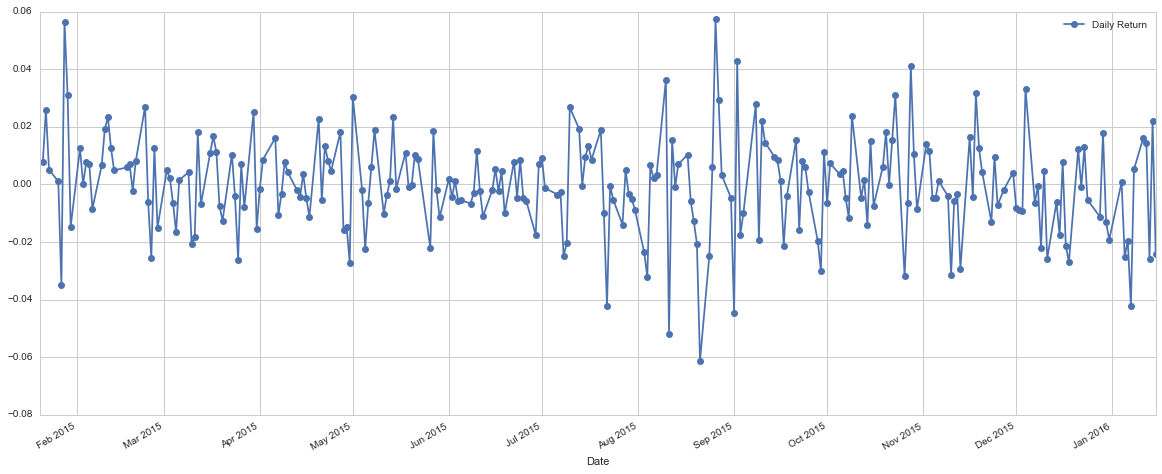

In [13]:
AAPL['Daily Return'] = AAPL['Adj Close'].pct_change()
AAPL['Daily Return'].plot(legend=True,figsize=(20,8),marker='o')

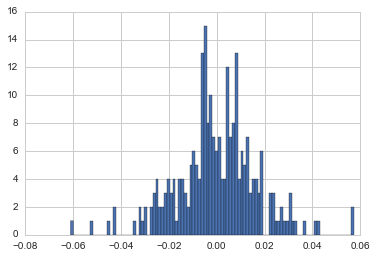

In [14]:
AAPL['Daily Return'].hist(bins=100)

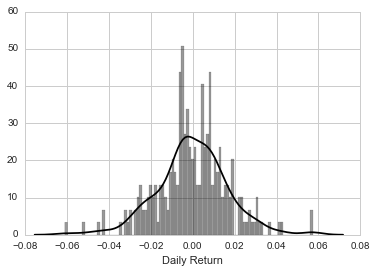

In [15]:
sns.distplot(AAPL['Daily Return'].dropna(),bins=100,color='black')

In [16]:
closing_df = DataReader(['AAPL','MSFT','GOOG','AMZN','SNE'],'yahoo',start,end)['Adj Close']

In [17]:
closing_df.head()

,AAPL,AMZN,GOOG,MSFT,SNE
Date,,,,,
2015-01-20,106.898626,289.440002,506.902294,45.160563,20.820000
2015-01-21,107.714723,297.250000,518.042312,44.703018,21.910000
2015-01-22,110.516976,310.320007,534.392450,45.880953,22.170000
2015-01-23,111.087261,312.390015,539.952437,45.929627,22.600000
2015-01-26,111.205246,309.660004,535.212448,45.764130,23.370001


In [18]:
tech_rt = closing_df.pct_change()

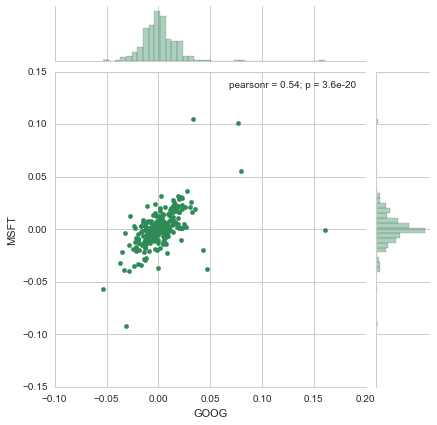

In [19]:
sns.jointplot('GOOG','MSFT',tech_rt,kind = 'scatter',color='seagreen')

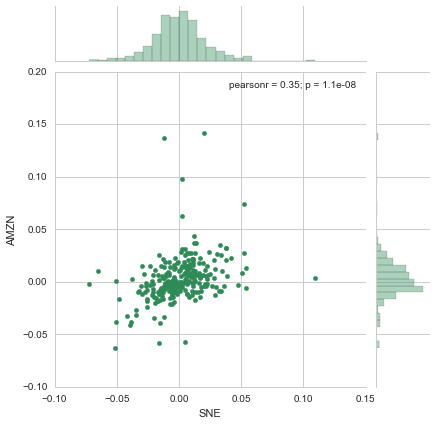

In [20]:
sns.jointplot('SNE','AMZN',tech_rt,kind = 'scatter',color='seagreen')

In [26]:
tech_rt.head()

,AAPL,AMZN,GOOG,MSFT,SNE
Date,,,,,
2015-01-20,NaN,NaN,NaN,NaN,NaN
2015-01-21,0.007634,0.026983,0.021977,-0.010132,0.052354
2015-01-22,0.026016,0.043970,0.031561,0.026350,0.011867
2015-01-23,0.005160,0.006671,0.010404,0.001061,0.019396
2015-01-26,0.001062,-0.008739,-0.008779,-0.003603,0.034071


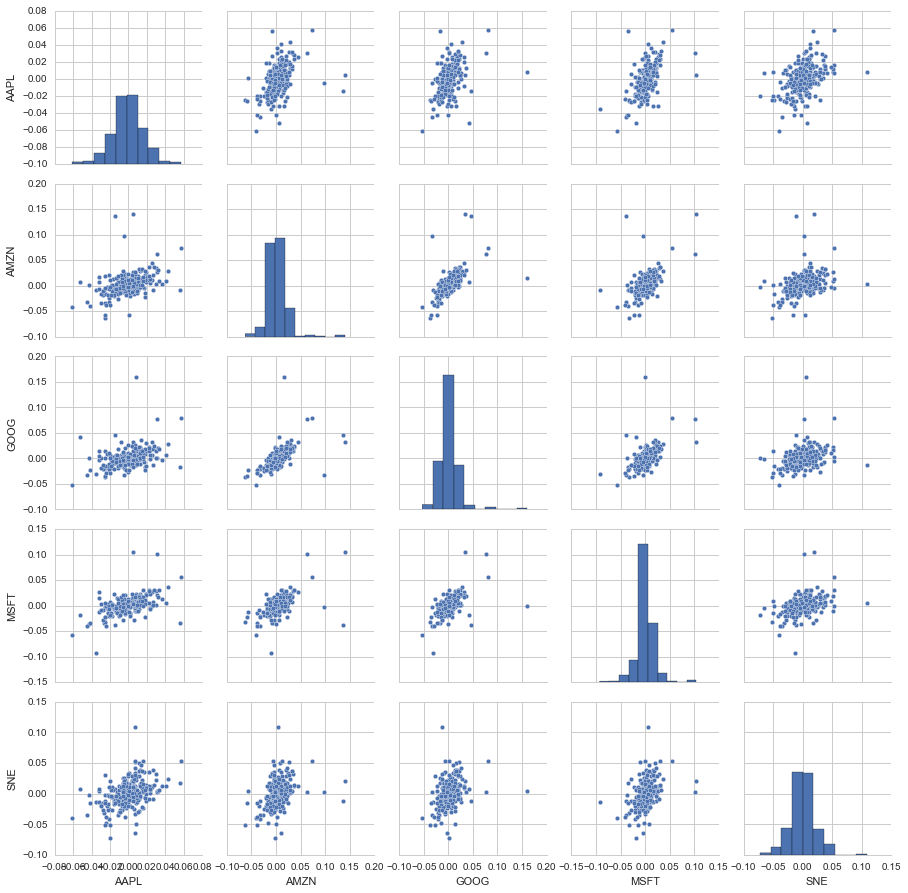

In [28]:
sns.pairplot(tech_rt.dropna())

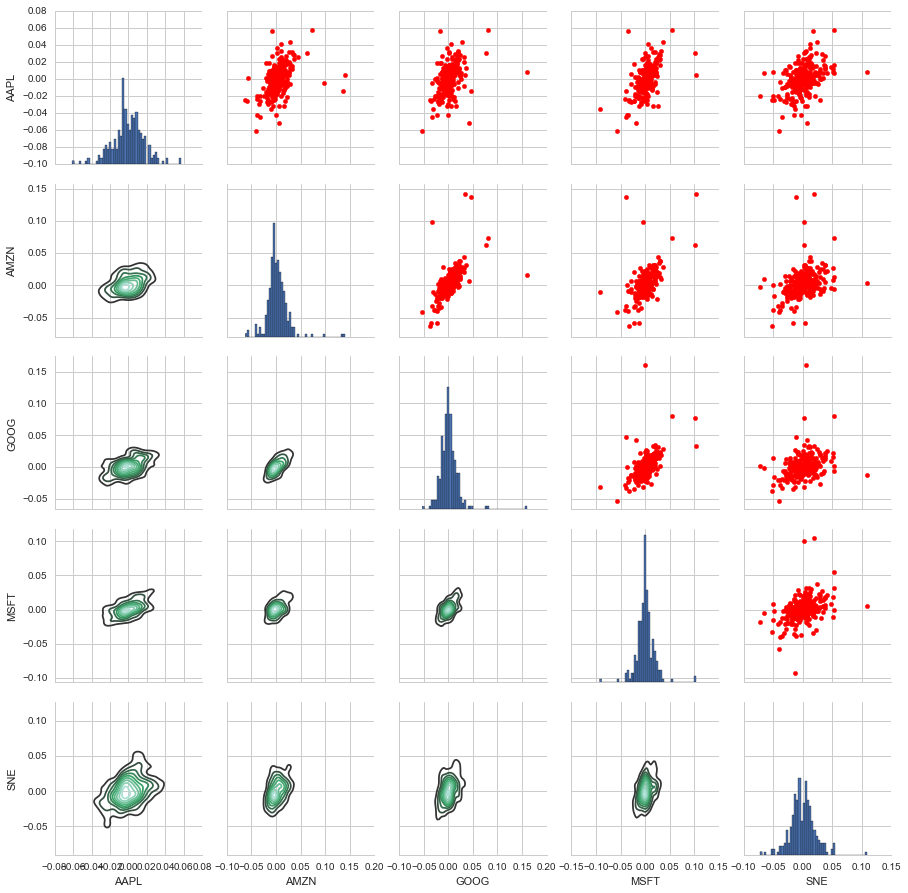

In [29]:
fig = sns.PairGrid(tech_rt.dropna())

fig.map_upper(plt.scatter,color='red')

fig.map_lower(sns.kdeplot,color='blue')

fig.map_diag(plt.hist,bins=50)


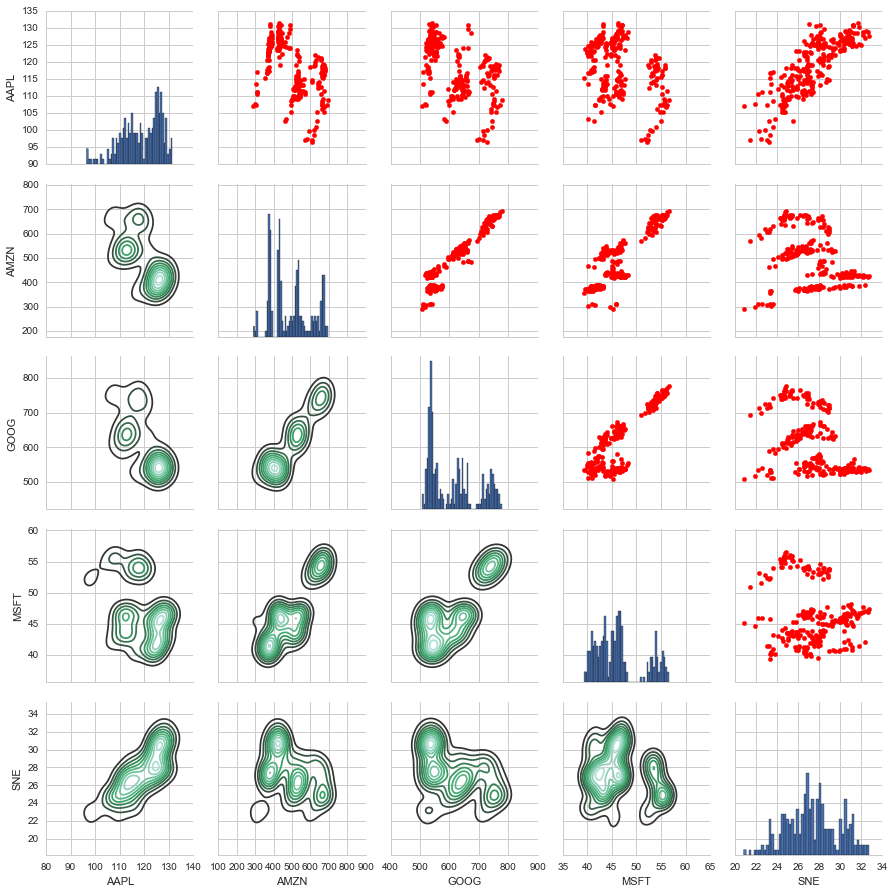

In [30]:
fig = sns.PairGrid(closing_df)

fig.map_upper(plt.scatter,color='red')

fig.map_lower(sns.kdeplot,color='blue')

fig.map_diag(plt.hist,bins=50)

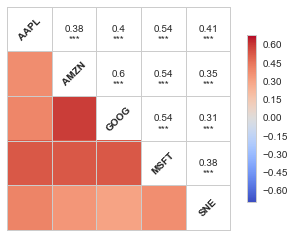

In [34]:
sns.corrplot(tech_rt.dropna(),annot=True)

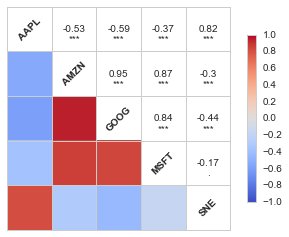

In [36]:
sns.corrplot(closing_df)

## Risk Analysis


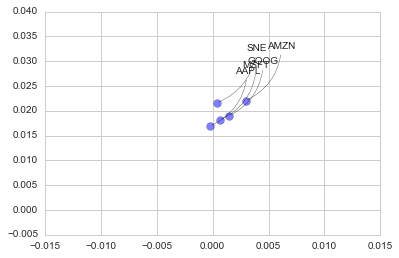

In [55]:
returns = tech_rt.dropna()

area = np.pi*20

plt.scatter(returns.mean(),returns.std(),alpha=0.5,s=area)

plt.xlabel = ('Expected Returns')
plt.ylabel = ('Risk')

for label,x,y in zip(returns.columns,returns.mean(),returns.std()):
    plt.annotate(
    label,
    xy=(x,y),xytext = (50,50),
    textcoords = 'offset points', ha = 'right',va = 'bottom',
    arrowprops = dict(arrowstyle = '-', connectionstyle = 'arc3,rad=-0.3'))